In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Song.csv")

In [3]:
df.head()

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
0,Bill Haley & his Comets,Rock Around the Clock,1955,36.503,19.961,7.458,5.663,0.760
1,Celine Dion,My Heart Will Go On,1998,35.405,12.636,8.944,23.701,3.610
2,Sinead O'Connor,Nothing Compares 2 U,1990,35.135,14.582,10.242,23.747,2.733
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
4,Bryan Adams,(Everything I Do) I Do it For You,1991,34.367,16.523,12.368,23.194,3.121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist       4850 non-null   object 
 1   Title        4850 non-null   object 
 2   Year         4850 non-null   int64  
 3   Sales        4850 non-null   float64
 4   Streams      4850 non-null   float64
 5   Downloads    4850 non-null   float64
 6   Radio Plays  4850 non-null   float64
 7   Rating       4850 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 303.3+ KB


# Number of rows and columns in dataset

In [6]:
print("Number of Rows: \t",df.shape[0])
print("Number of columns: \t",df.shape[1])

Number of Rows: 	 4850
Number of columns: 	 8


In [7]:
df.columns

Index(['Artist', 'Title', 'Year', 'Sales', 'Streams', 'Downloads',
       'Radio Plays', 'Rating'],
      dtype='object')

# columns identification numerical & categorical

In [9]:
numerical=['Sales', 'Streams', 'Downloads',
       'Radio Plays']
print("Numerical Columns :",numerical)
categorical=['Year','Artist', 'Title','Rating']
print("Categorical Columns",categorical)

Numerical Columns : ['Sales', 'Streams', 'Downloads', 'Radio Plays']
Categorical Columns ['Year', 'Artist', 'Title', 'Rating']


In [10]:
df.describe()

,Year,Sales,Streams,Downloads,Radio Plays,Rating
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,1979.861443,8.154870,4.628823,2.970114,3.985120,0.481876
std,19.759676,4.555715,3.273776,2.668744,4.354419,0.624719
min,1901.000000,4.149000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,5.069250,2.351250,1.039500,0.600000,0.000000
50%,1981.000000,6.438000,4.200000,2.200000,2.570000,0.512000
75%,1996.000000,9.784000,6.307000,4.183750,5.884000,0.571000
max,2014.000000,36.503000,25.545000,19.780000,24.393000,4.460000


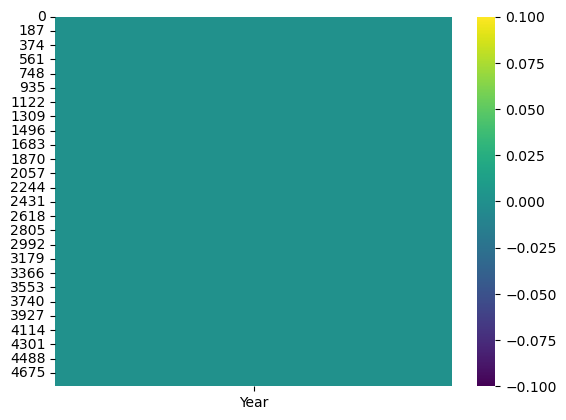

In [11]:
sns.heatmap(df[["Year"]].isnull(), cmap='viridis')
plt.show()

# correlation heatmap


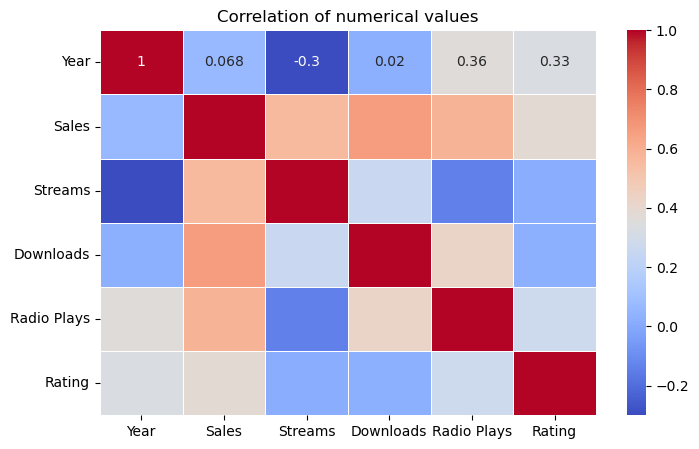

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of numerical values")
plt.show()


# Unique Values in each columns

In [21]:
my_df=pd.DataFrame({ "column_name":list(df.columns),
                    "unique_values":[df[i].nunique() for i in list(df.columns)]    
})
my_df.sort_values(by="unique_values",ascending=False)

,column_name,unique_values
1,Title,4480
3,Sales,3550
4,Streams,3424
6,Radio Plays,2777
5,Downloads,2274
0,Artist,2243
7,Rating,579
2,Year,102


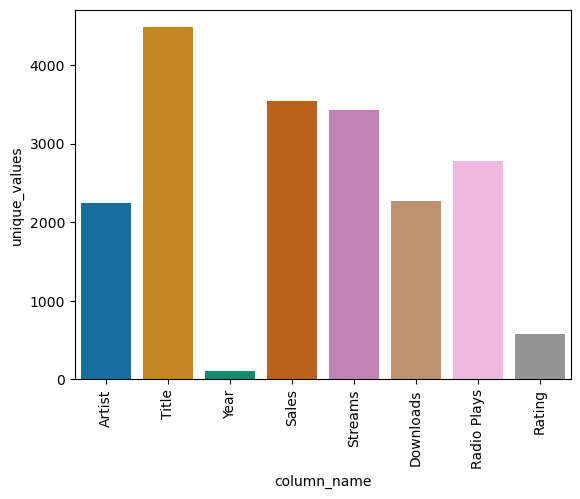

In [23]:
sns.barplot(x="column_name", y= "unique_values", data=my_df,palette="colorblind")
plt.xticks(rotation=90)
plt.show()

# Outlier

Sales


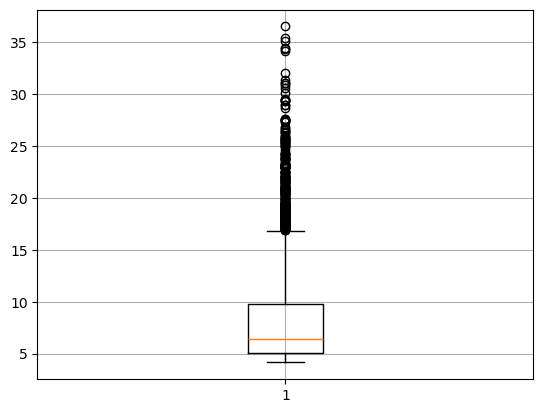

Streams


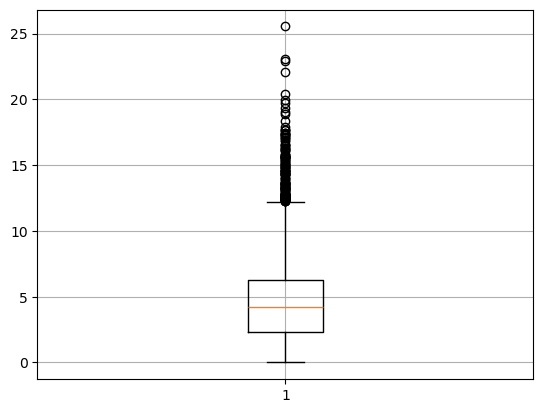

Downloads


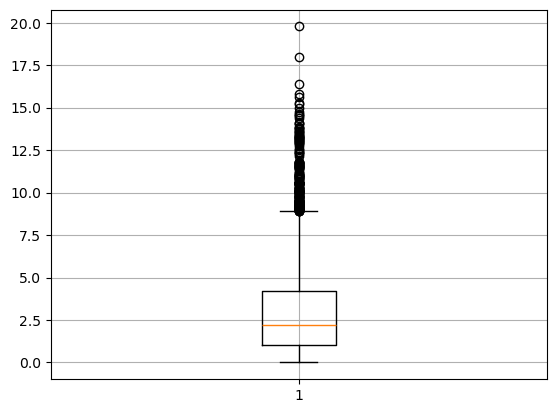

Radio Plays


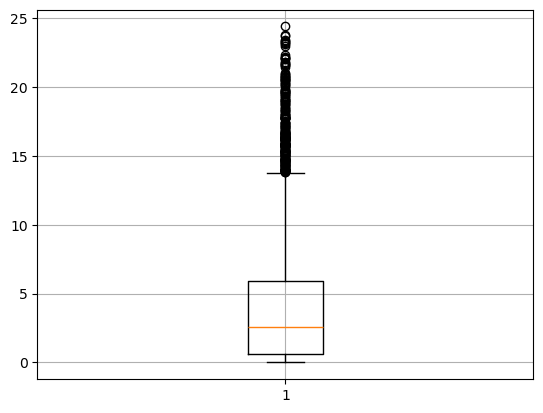

In [26]:
for i in numerical:
    print(i)
    plt.boxplot(df[i])
    plt.grid()
    plt.show()

# Year

In [29]:
df["Year"].describe().reset_index()

,index,Year
0,count,4850.000000
1,mean,1979.861443
2,std,19.759676
3,min,1901.000000
4,25%,1967.000000
5,50%,1981.000000
6,75%,1996.000000
7,max,2014.000000


# Year sum of wise sale, streams, downloads, radio plays

In [31]:
year=df.groupby("Year")[['Sales', 'Streams', 'Downloads', 'Radio Plays']].sum().sort_values(by="Sales",ascending=False)
year

,Sales,Streams,Downloads,Radio Plays
Year,,,,
1997,785.534,255.687,227.059,512.943
1996,757.328,252.010,219.006,506.775
1970,744.903,605.647,370.138,342.806
1995,739.820,260.845,181.030,450.965
1990,738.971,312.145,164.683,496.824
...,...,...,...,...
1901,7.097,5.883,0.000,0.000
1933,5.631,4.587,0.000,0.000
1919,5.576,4.500,0.000,0.000


<Axes: >

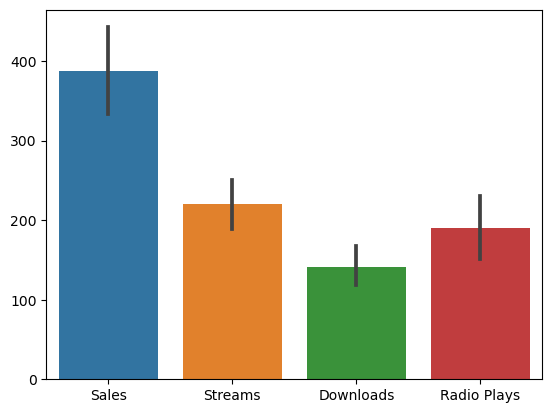

In [32]:
sns.barplot(year)

# Distribution of each columns

<Figure size 1000x800 with 0 Axes>

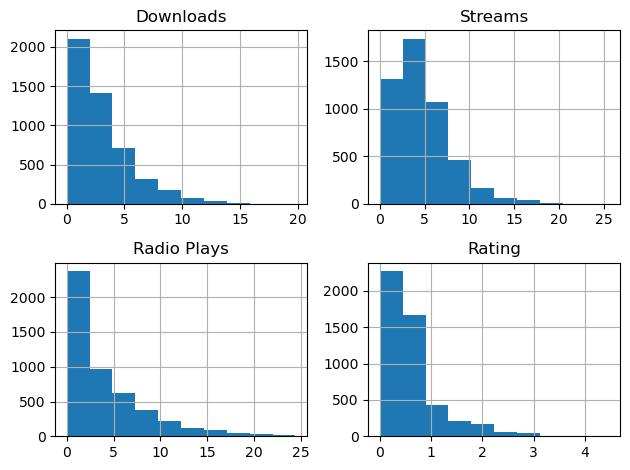

In [36]:
plt.figure(figsize=(10, 8))
df[["Downloads","Streams","Radio Plays","Rating"]].hist(bins=10)
plt.tight_layout()
plt.show()

In [37]:
yearly = df.groupby('Year')[['Sales', 'Streams', 'Downloads','Radio Plays']].sum().reset_index()
yearly

,Year,Sales,Streams,Downloads,Radio Plays
0,1901,7.097,5.883,0.000,0.000
1,1909,5.444,5.423,0.000,0.000
2,1911,7.254,6.059,0.000,0.000
3,1913,5.150,3.832,0.833,0.000
4,1917,10.927,8.726,0.000,0.000
...,...,...,...,...,...
97,2010,427.680,203.258,123.848,89.192
98,2011,350.265,172.228,105.448,81.197
99,2012,311.960,156.885,90.253,82.910
100,2013,139.377,73.538,55.037,51.150


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

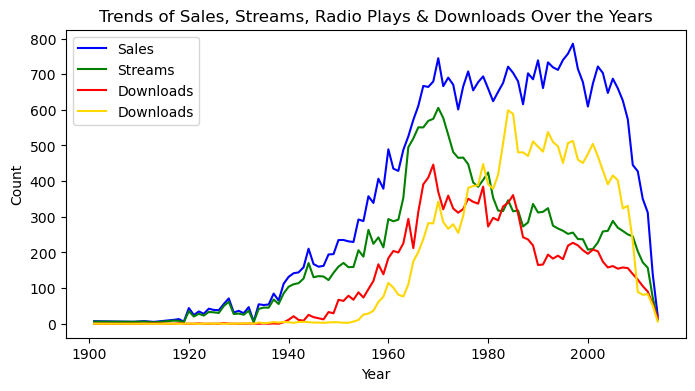

In [39]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly, x='Year', y='Sales', label='Sales', color='blue')
sns.lineplot(data=yearly, x='Year', y='Streams', label='Streams', color='green')
sns.lineplot(data=yearly, x='Year', y='Downloads', label='Downloads', color='red')
sns.lineplot(data=yearly, x='Year', y='Radio Plays', label='Downloads', color='gold')

plt.title("Trends of Sales, Streams, Radio Plays & Downloads Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

# relationship with year and others

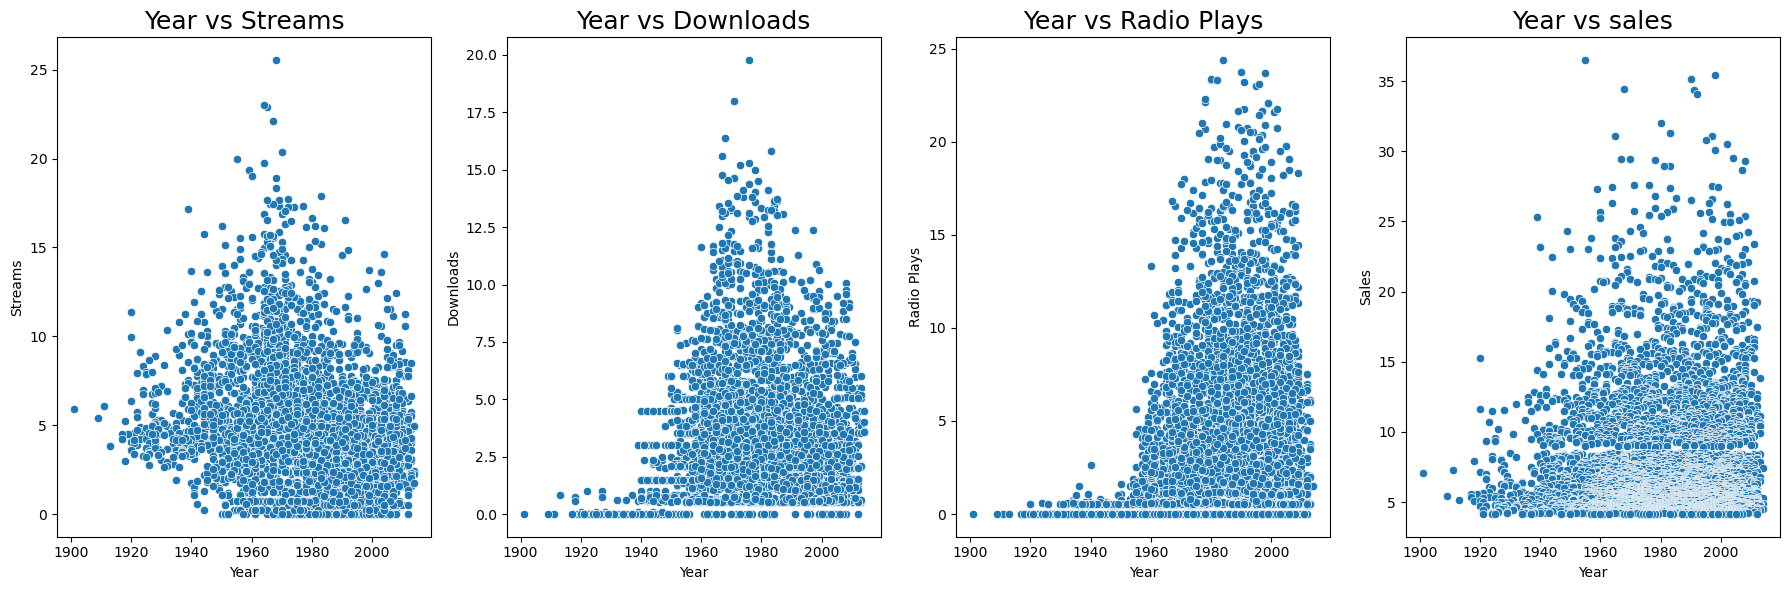

In [41]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot Year vs Streams
sns.scatterplot(x="Year", y="Streams", data=df, ax=axes[0])
axes[0].set_title("Year vs Streams",fontsize=18)

# Plot Year vs Downloads
sns.scatterplot(x="Year", y="Downloads", data=df, ax=axes[1])
axes[1].set_title("Year vs Downloads",fontsize=18)

# Plot Year vs Radio Plays
sns.scatterplot(x="Year", y="Radio Plays", data=df, ax=axes[2])
axes[2].set_title("Year vs Radio Plays",fontsize=18)

# Plot Year vs sales
sns.scatterplot(x="Year", y="Sales", data=df, ax=axes[3])
axes[3].set_title("Year vs sales",fontsize=18)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Replationship with sales and others numerical columns

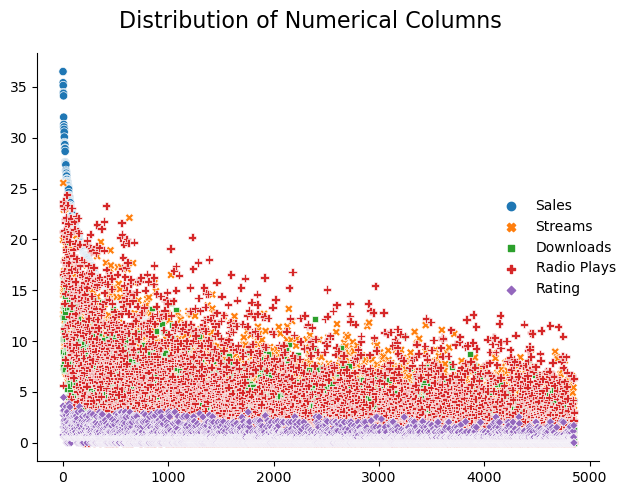

In [44]:
numerical_columns = ['Sales', 'Streams', 'Downloads', 'Radio Plays', 'Rating']
sns.relplot(data=df[numerical_columns])
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()


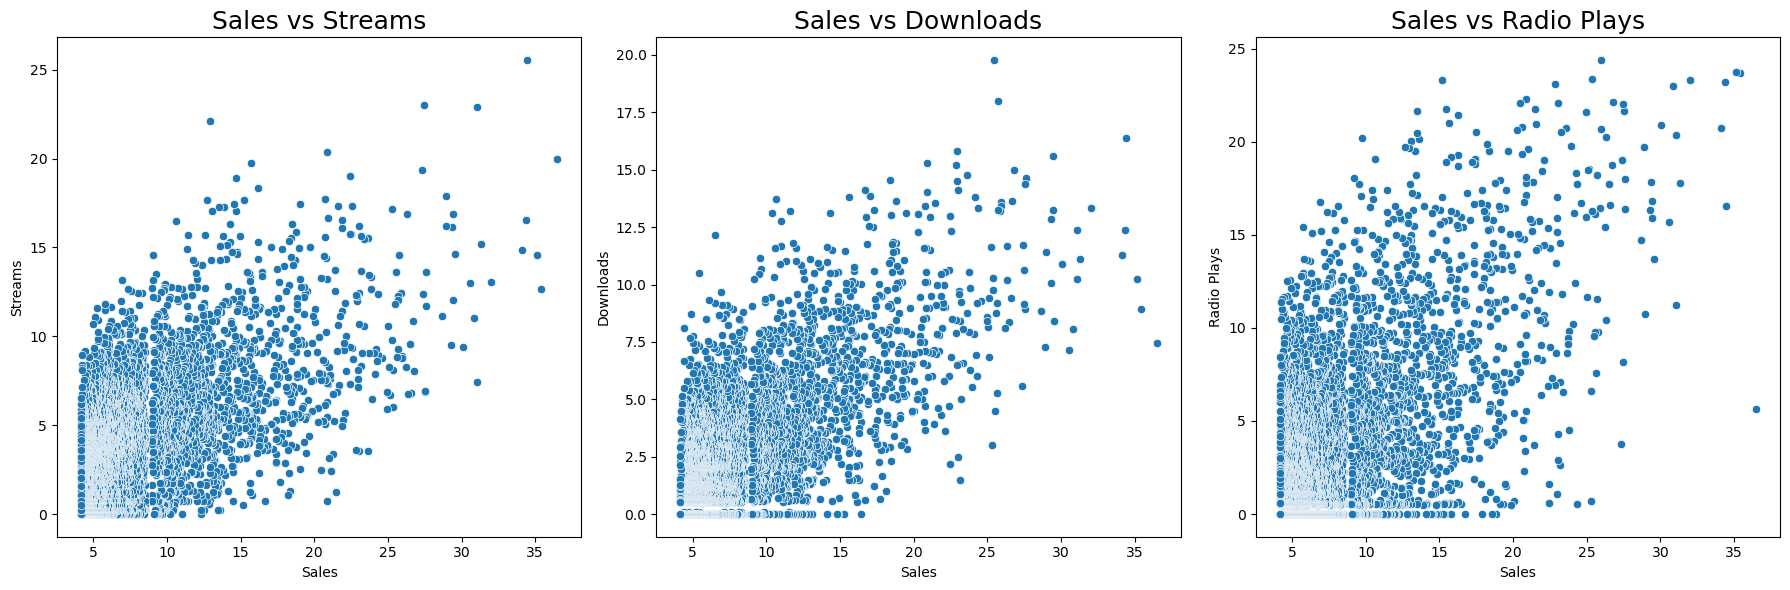

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Sales vs Streams
sns.scatterplot(x="Sales", y="Streams", data=df, ax=axes[0],)
axes[0].set_title("Sales vs Streams",fontsize=18)

# Plot Sales vs Downloads
sns.scatterplot(x="Sales", y="Downloads", data=df, ax=axes[1])
axes[1].set_title("Sales vs Downloads",fontsize=18)

# Plot Sales vs Radio Plays
sns.scatterplot(x="Sales", y="Radio Plays", data=df, ax=axes[2])
axes[2].set_title("Sales vs Radio Plays",fontsize=18)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Year wise sale

In [47]:
year_sales=df.groupby("Year")["Sales"].sum().sort_values(ascending=False).reset_index()
year_sales

,Year,Sales
0,1997,785.534
1,1996,757.328
2,1970,744.903
3,1995,739.820
4,1990,738.971
...,...,...
97,1901,7.097
98,1933,5.631
99,1919,5.576
100,1909,5.444


# highest number of song release in year

In [49]:
df.groupby("Year")["Year"].value_counts().reset_index().sort_values(by="count",ascending=False).head(1)

,Year,count
84,1997,95


# most number of song released in any 10 year?


In [51]:
high_song_year= df.groupby("Year")["Year"].value_counts().reset_index().sort_values(by="count",ascending=False).head(10).set_index("Year")
high_song_year

,count
Year,
1997,95
1975,94
1972,94
1992,93
2003,92
1989,91
1988,90
1995,89
1970,89


# Highest sale in any years?


In [55]:
high_sale=df.groupby("Year")["Sales"].sum().sort_values(ascending=False).reset_index().head(10).set_index("Year")
high_sale

,Sales
Year,
1997,785.534
1996,757.328
1970,744.903
1995,739.820
1990,738.971
1992,733.191
2002,721.709
1984,721.221
1993,719.338


# Highest Streams in any years?


In [57]:
High_Streams=df.groupby("Year")["Streams"].sum().sort_values(ascending=False).reset_index().head(10).set_index("Year")
High_Streams

,Streams
Year,
1970,605.647
1971,577.393
1969,574.804
1968,569.151
1966,550.874
1967,550.761
1972,529.803
1965,519.603
1964,495.256


# Highest Radio play in any years?


In [59]:
High_radio=df.groupby("Year")["Radio Plays"].sum().sort_values(ascending=False).reset_index().head(10).set_index("Year")
High_radio

,Radio Plays
Year,
1984,598.846
1985,588.497
1992,537.854
1997,512.943
1989,511.514
1993,509.757
1996,506.775
1983,506.171
2001,504.719


# Highest downloads in any years?

In [62]:
High_downloads=df.groupby("Year")["Downloads"].sum().sort_values(ascending=False).reset_index().head(10).set_index("Year")
High_downloads

,Downloads
Year,
1969,446.401
1968,409.909
1967,390.999
1979,384.581
1970,370.138
1985,360.746
1972,359.417
1976,350.768
1977,341.917


# Highest average Rating in any years?


In [64]:
High_rating=df.groupby("Year")["Rating"].mean().sort_values(ascending=False).reset_index().head(10).set_index("Year")
High_rating

,Rating
Year,
1991,1.382301
1990,1.258721
1989,1.199538
1993,1.176779
1992,1.156849
1994,1.109422
1997,1.065705
1995,1.053056
1996,1.044125


# lowest Rating in any years?


In [66]:
low_rating=df.groupby("Year")["Rating"].mean().sort_values().reset_index().head(10).set_index("Year")
low_rating

,Rating
Year,
2014,0.000000
1909,0.000000
2012,0.000000
1913,0.000000
2011,0.000000
2010,0.000000
2013,0.000000
1958,0.096875
1938,0.105500


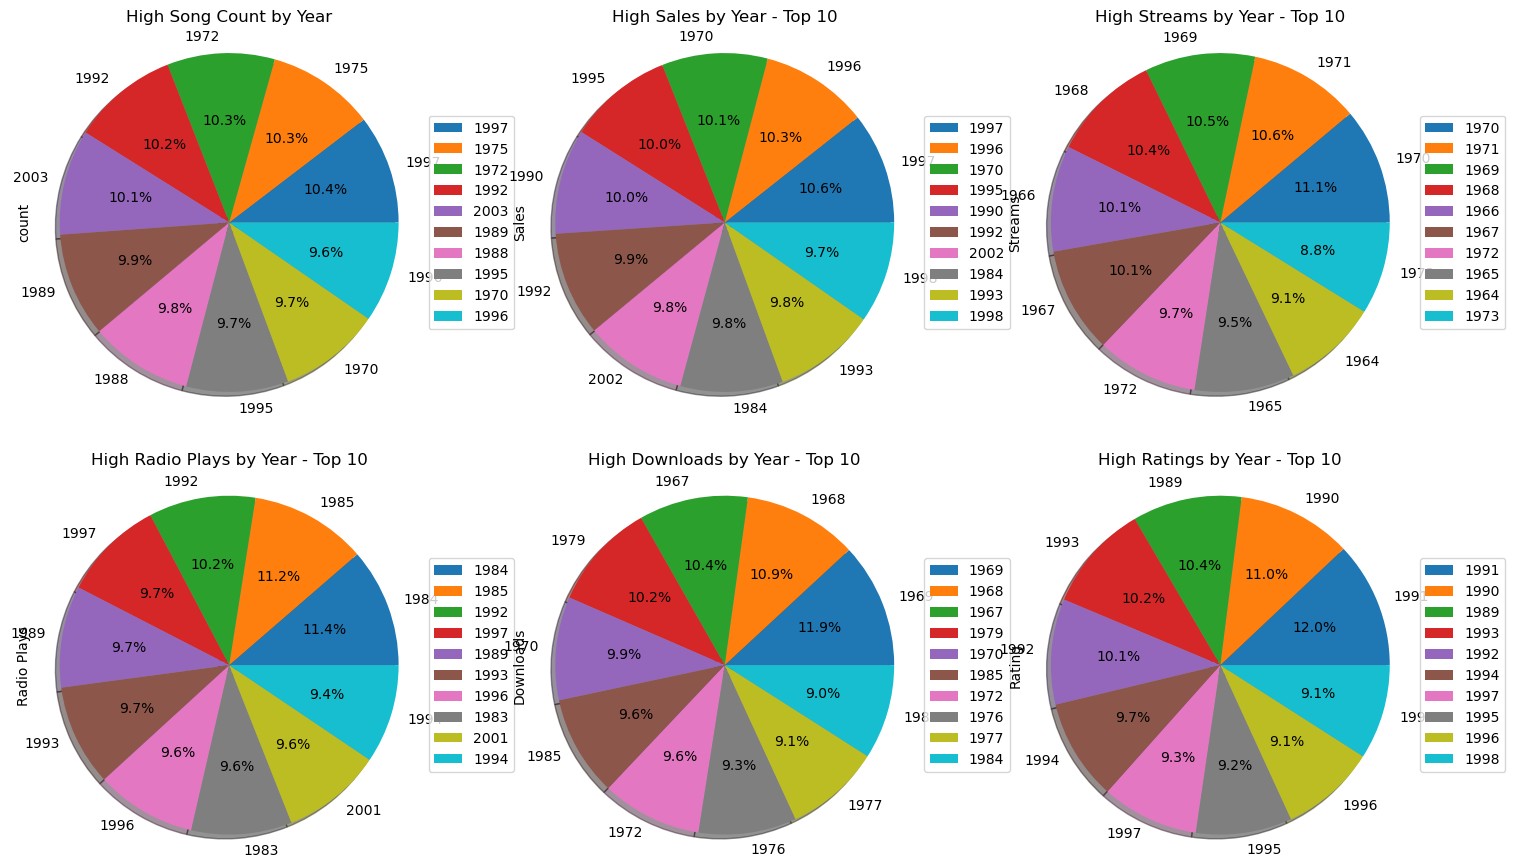

In [67]:
# pie chart for all columns year wise
fig, axes = plt.subplots(2, 3, figsize=(15 ,9))

axes[0, 1].set_title("High Sales by Year - Top 10")
axes[0, 2].set_title("High Streams by Year - Top 10")
axes[1, 0].set_title("High Radio Plays by Year - Top 10")
axes[1, 1].set_title("High Downloads by Year - Top 10")
axes[1, 2].set_title("High Ratings by Year - Top 10")

# Plot 1: high_song_year pie chart
high_song_year.plot(kind="pie", y="count", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[0, 0])
axes[0, 0].set_title("High Song Count by Year")
axes[0, 0].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Plot 2: high_sale pie chart
high_sale.plot(kind="pie", y="Sales", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[0, 1])
axes[0, 1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Plot 3: High_Streams pie chart
High_Streams.plot(kind="pie", y="Streams", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[0, 2])
axes[0, 2].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Plot 4: High_radio pie chart
High_radio.plot(kind="pie", y="Radio Plays", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[1, 0])
axes[1, 0].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Plot 5: High_downloads pie chart
High_downloads.plot(kind="pie", y="Downloads", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[1, 1])
axes[1, 1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Plot 6: High_rating pie chart
High_rating.plot(kind="pie", y="Rating", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[1, 2])
axes[1, 2].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


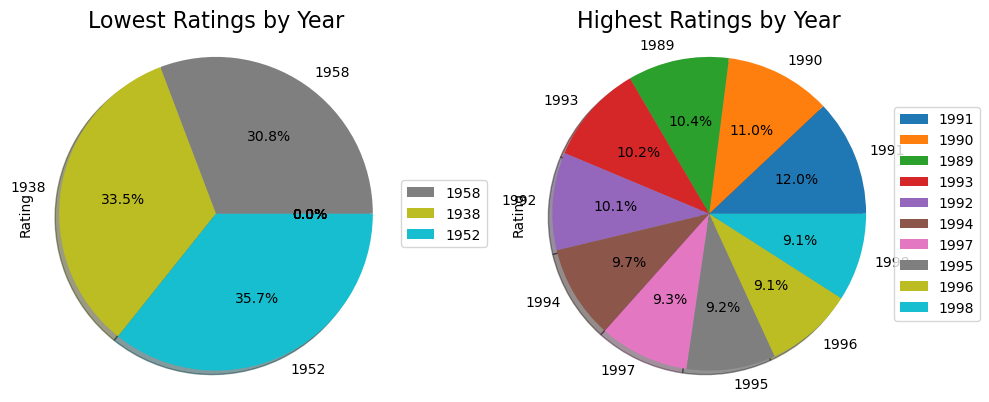

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

axes[0].set_title("Lowest Ratings by Year", fontsize=16)
axes[1].set_title("Highest Ratings by Year", fontsize=16)

low_rating.plot(kind="pie", y="Rating", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[0])
axes[0].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

High_rating.plot(kind="pie", y="Rating", autopct="%0.1f%%", pctdistance=0.6, radius=1.1, shadow=True, ax=axes[1])
axes[1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


# Distribution of song by year

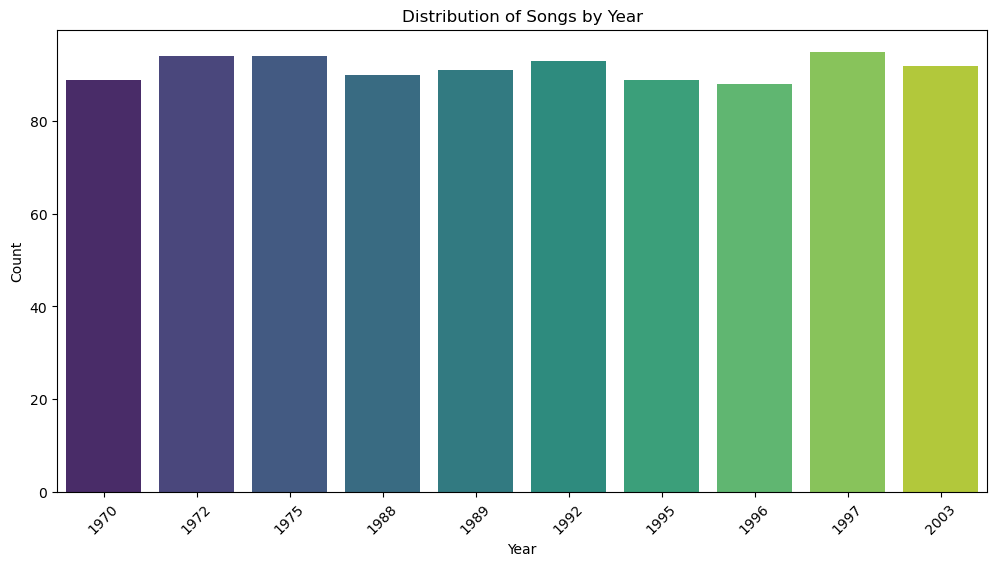

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x=high_song_year.index, y='count', data=high_song_year, palette='viridis')
plt.title("Distribution of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


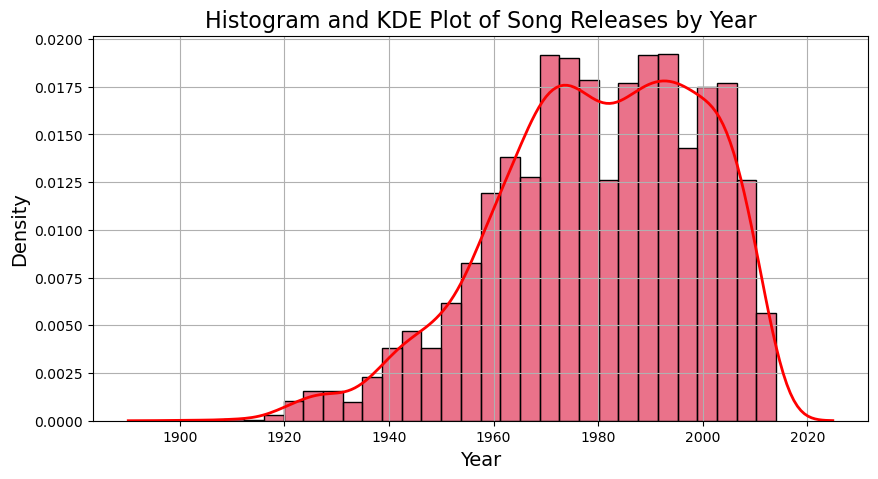

In [71]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Year", bins=30, color='crimson', kde=False, stat='density', alpha=0.6)
sns.kdeplot(data=df, x="Year", color='red', linewidth=2)
plt.title("Histogram and KDE Plot of Song Releases by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid()

plt.show()


# Average rating over the years

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


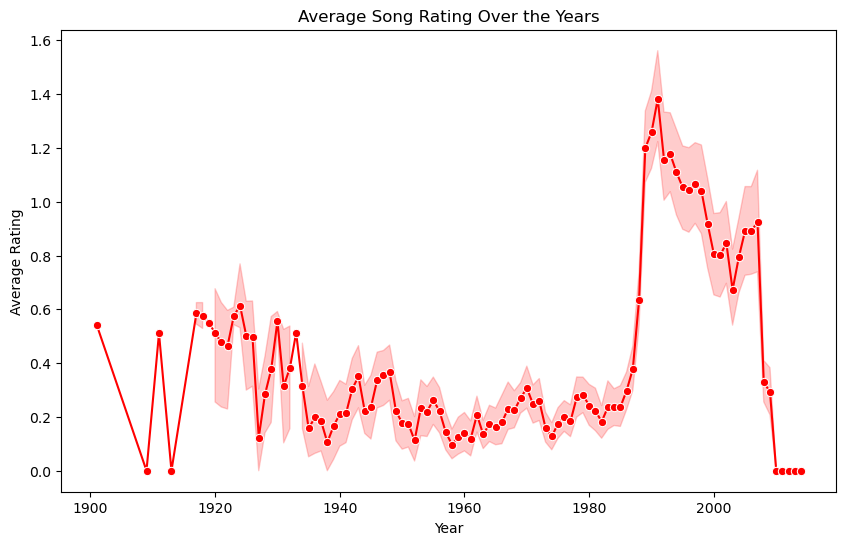

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating', marker="o", color="red")
plt.title("Average Song Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


# Sales

In [75]:
df["Sales"].describe().reset_index()

,index,Sales
0,count,4850.000000
1,mean,8.154870
2,std,4.555715
3,min,4.149000
4,25%,5.069250
5,50%,6.438000
6,75%,9.784000
7,max,36.503000


In [76]:
df[df["Sales"]>15]

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
0,Bill Haley & his Comets,Rock Around the Clock,1955,36.503,19.961,7.458,5.663,0.760
1,Celine Dion,My Heart Will Go On,1998,35.405,12.636,8.944,23.701,3.610
2,Sinead O'Connor,Nothing Compares 2 U,1990,35.135,14.582,10.242,23.747,2.733
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
4,Bryan Adams,(Everything I Do) I Do it For You,1991,34.367,16.523,12.368,23.194,3.121
...,...,...,...,...,...,...,...,...
417,Michael Jackson,Don't Stop 'Til You Get Enough,1979,15.097,8.660,8.767,7.867,0.583
418,Hot Butter,Popcorn,1972,15.066,4.060,5.944,16.352,0.000
419,The Bangles,Eternal Flame,1989,15.055,5.757,7.759,10.875,1.600
420,Santana,Maria Maria,2000,15.047,5.383,2.167,15.607,1.105


In [77]:
sale_q25,sale_q75=np.percentile(df["Sales"],(25,75))
sale_IQR=sale_q75-sale_q25
sale_q0=sale_q25-(1.5*sale_IQR)
sale_q100=sale_q75+(1.5*sale_IQR)

In [78]:
print("IQR:",sale_IQR)
print("q0:",sale_q0)
print("q25:",sale_q25)
print("q75:",sale_q75)
print("q100:",sale_q100)

IQR: 4.71475
q0: -2.0028750000000004
q25: 5.06925
q75: 9.784
q100: 16.856125000000002


In [79]:
df["Sales"].skew()

2.016584621262991

In [80]:
df[df["Sales"]<5]

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
3705,Finger Eleven,Paralyzer,2007,4.998,5.386,1.417,0.000,0.000
3706,Adam & The Ants,Antmusic,1981,4.998,1.200,6.135,1.968,0.000
3707,Freddy Quinn,Junge komm bald wieder,1962,4.998,0.200,0.000,5.043,0.000
3708,The Smashing Pumpkins,"Tonight, Tonight",1996,4.995,3.262,0.643,1.104,0.510
3709,Blind Lemon Jefferson,Matchbox Blues,1927,4.992,4.973,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
4845,Rihanna,If It's Lovin' That You Want,2005,4.150,1.573,1.107,2.196,0.510
4846,Al Jolson,All Alone,1925,4.150,3.211,0.000,0.000,0.548
4847,Sailor,"Girls, Girls, Girls",1976,4.149,0.200,1.220,6.344,0.000
4848,Inner Circle,Games People Play,1994,4.149,0.512,0.515,3.097,1.700


In [81]:
print("Min:",df["Sales"].min())
print("max",df["Sales"].max())
print("mean",df["Sales"].mean())
print("median",df["Sales"].median())
print("Skew",df["Sales"].skew())

Min: 4.149
max 36.503
mean 8.154870103092783
median 6.438
Skew 2.016584621262991


<Axes: >

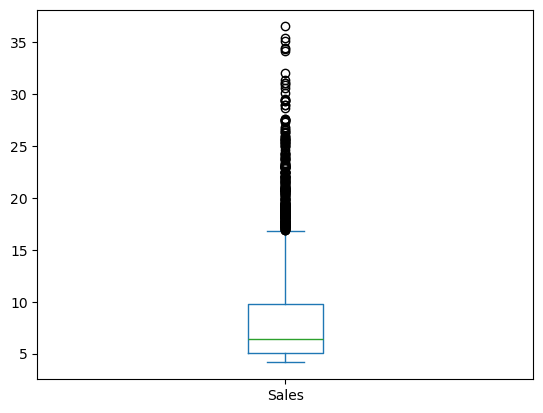

In [83]:
df["Sales"].plot(kind="box")

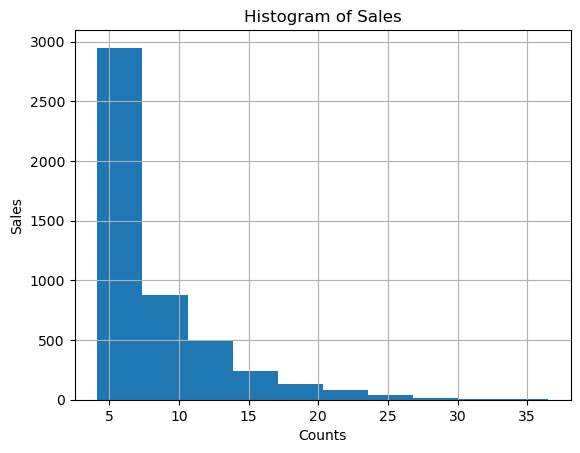

In [84]:
df["Sales"].hist()
plt.xlabel("Counts")
plt.ylabel("Sales")
plt.title("Histogram of Sales")
plt.show()

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


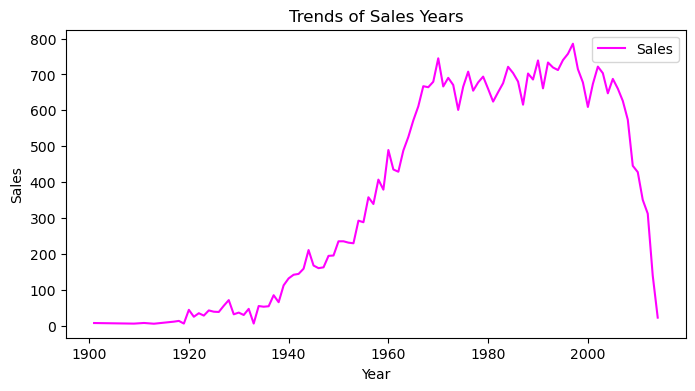

In [85]:
sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=sales, x='Year', y='Sales', label='Sales', color='magenta')
plt.title("Trends of Sales Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [86]:
# sum of sales by year
df1=df.groupby("Year").sum().reset_index()
df1

,Year,Artist,Title,Sales,Streams,Downloads,Radio Plays,Rating
0,1901,Sousa's Band,Stars & Stripes Forever,7.097,5.883,0.000,0.000,0.543
1,1909,Fisk University Jubilee Quartet,"Swing Low, Sweet Chariot",5.444,5.423,0.000,0.000,0.000
2,1911,Sophie Tucker,Some of These Days,7.254,6.059,0.000,0.000,0.511
3,1913,Chauncy Olcott,When Irish Eyes Are Smiling,5.150,3.832,0.833,0.000,0.000
4,1917,Nora BayesAmerican Quartet,Over ThereOver There,10.927,8.726,0.000,0.000,1.170
...,...,...,...,...,...,...,...,...
97,2010,Eminem & RihannaBruno MarsKaty Perry & Snoop D...,Love The Way You LieJust the Way You AreCalifo...,427.680,203.258,123.848,89.192,0.000
98,2011,Rihanna & Calvin HarrisLMFAOAdeleBruno MarsLad...,We Found LoveParty Rock AnthemRolling In The D...,350.265,172.228,105.448,81.197,0.000
99,2012,Gotye & KimbraCarly Rae JepsenPsyfun.Flo-RidaB...,Somebody That I Used to KnowCall Me MaybeGangn...,311.960,156.885,90.253,82.910,0.000
100,2013,"Robin Thicke, T.I. & Pharrell WilliamsMacklemo...",Blurred LinesThrift ShopScream & ShoutWake Me ...,139.377,73.538,55.037,51.150,0.000


In [87]:
# top 10 artist with highest number of song sales
high=df.groupby("Artist").sum().sort_values(by="Sales",ascending=False).reset_index().head(10)
high.set_index("Artist",inplace=True)
pd.DataFrame(high["Sales"])

,Sales
Artist,
The Beatles,601.356
Madonna,517.961
Elvis Presley,476.344
The Rolling Stones,293.326
Michael Jackson,285.204
Elton John,258.627
Mariah Carey,246.102
Bee Gees,231.718
Abba,224.437


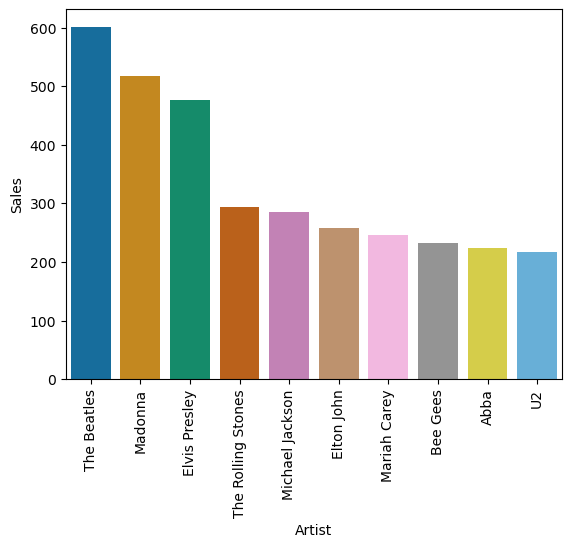

In [88]:
sns.barplot(y="Sales",x=high.index,data=high,palette="colorblind")
plt.xticks(rotation=90)
plt.show()

In [89]:
# Below 10 Artist with low song sales
low=df.groupby("Artist").sum().sort_values(by="Sales",ascending=False).reset_index().tail(10)
low.set_index("Artist",inplace=True)
pd.DataFrame(low["Sales"])

,Sales
Artist,
Jim Stafford,4.164
Puddle of Mudd,4.164
Bimbo Jet,4.164
Erykah Badu,4.164
K7,4.162
O C Smith,4.160
The Sex Pistols,4.160
Lyte Funkie Ones,4.158
Major Lance,4.151


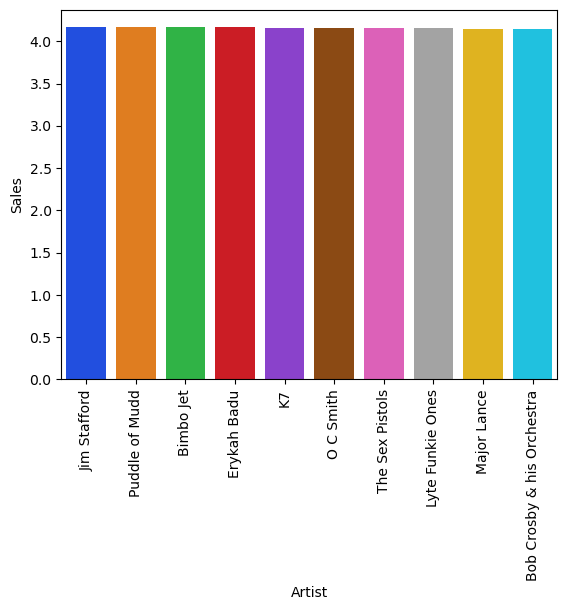

In [90]:
sns.barplot(y="Sales",x=low.index,data=low,palette="bright")
plt.xticks(rotation=90)
plt.show()

# Streams

In [92]:
df["Streams"].describe().reset_index()

,index,Streams
0,count,4850.000000
1,mean,4.628823
2,std,3.273776
3,min,0.000000
4,25%,2.351250
5,50%,4.200000
6,75%,6.307000
7,max,25.545000


In [93]:
df[df["Streams"]>6.30].sort_values(by="Streams",ascending=False)

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
25,The Beatles,I Want to Hold Your Hand,1964,27.470,23.042,9.171,8.192,1.010
9,The Rolling Stones,(I Can't Get No) Satisfaction,1965,31.054,22.926,10.258,11.252,0.556
630,Aretha Franklin,Respect,1967,12.896,22.122,3.217,1.108,0.000
127,Simon & Garfunkel,Bridge Over Troubled Water,1970,20.863,20.374,10.542,5.521,0.677
...,...,...,...,...,...,...,...,...
1564,Mary MacGregor,Torn Between Two Lovers,1977,8.196,6.308,7.143,1.171,0.000
2547,Chuck Berry,Sweet Little Sixteen,1958,6.269,6.304,2.063,0.000,0.000
126,Michael Jackson,Black Or White,1991,20.863,6.303,8.542,18.088,2.634
4707,Junior Walker & The All-Stars,What Does it Take (To Win Your Love),1969,4.238,6.302,1.577,0.000,0.510


<Axes: >

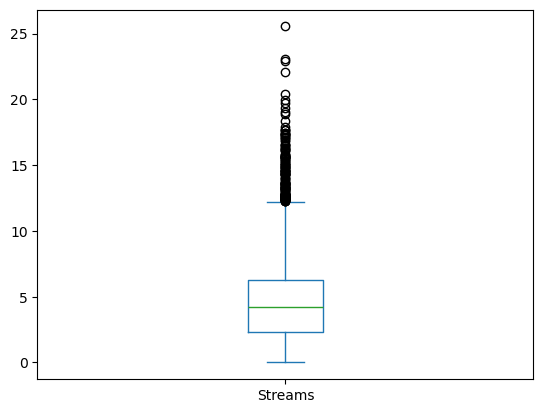

In [94]:
df["Streams"].plot(kind="box")

In [95]:
Streams_q25,Streams_q75=np.percentile(df["Streams"],(25,75))
Streams_IQR=Streams_q75-Streams_q25
Streams_q0=Streams_q25-(1.5*Streams_IQR)
Streams_q100=Streams_q75+(1.5*Streams_IQR)

In [96]:
print("IQR:",Streams_IQR)
print("q0:",Streams_q0)
print("q25:",Streams_q25)
print("q75:",Streams_q75)
print("q100:",Streams_q100)

IQR: 3.9557500000000005
q0: -3.582375000000001
q25: 2.35125
q75: 6.307
q100: 12.240625000000001


In [97]:
print("Min:",df["Streams"].min())
print("max",df["Streams"].max())
print("mean",df["Streams"].mean())
print("median",df["Streams"].median())
print("Skew",df["Streams"].skew())

Min: 0.0
max 25.545
mean 4.628822886597938
median 4.2
Skew 1.1340400955267176


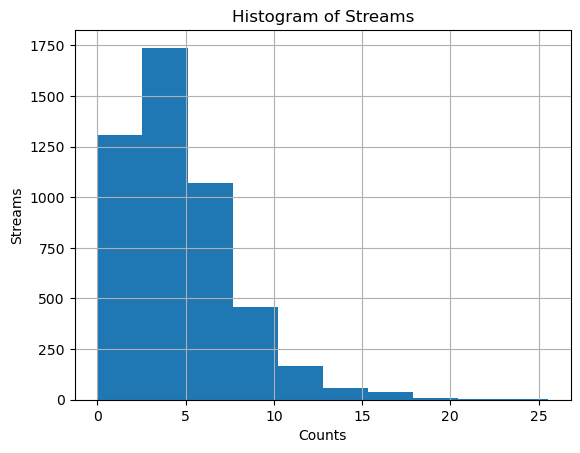

In [98]:
df["Streams"].hist()
plt.xlabel("Counts")
plt.ylabel("Streams")
plt.title("Histogram of Streams")
plt.show()

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


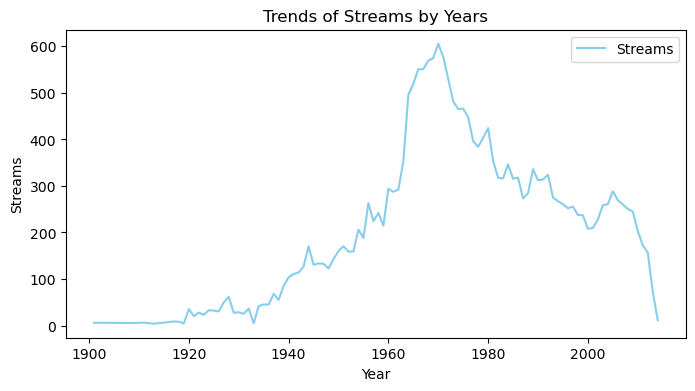

In [99]:
Streams = df.groupby('Year')['Streams'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=Streams, x='Year', y='Streams', label='Streams', color='skyblue')
plt.title("Trends of Streams by Years")
plt.xlabel("Year")
plt.ylabel("Streams")
plt.legend()
plt.show()

# Downloads

In [102]:
df["Downloads"].describe().reset_index()

,index,Downloads
0,count,4850.000000
1,mean,2.970114
2,std,2.668744
3,min,0.000000
4,25%,1.039500
5,50%,2.200000
6,75%,4.183750
7,max,19.780000


In [103]:
df[df["Downloads"]>4.18].sort_values(by="Downloads",ascending=False)

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
44,Queen,Bohemian Rhapsody,1976,25.468,11.819,19.780,9.572,0.538
38,John Lennon,Imagine,1971,25.732,14.567,17.978,9.755,1.119
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
79,Culture Club,Karma Chameleon,1983,22.967,7.164,15.818,15.898,0.529
15,Procol Harum,A Whiter Shade of Pale,1967,29.428,12.018,15.602,16.833,0.558
...,...,...,...,...,...,...,...,...
521,Barbra Streisand,The Way We Were,1974,13.862,17.263,4.199,0.511,0.519
3192,Association,Windy,1967,5.481,8.746,4.195,0.000,0.000
678,Perez Prado,Patricia,1958,12.603,4.817,4.189,3.042,0.534
1934,David Bowie,Ashes to Ashes,1980,7.312,2.285,4.184,7.131,0.000


In [104]:
print("Min:",df["Downloads"].min())
print("max",df["Downloads"].max())
print("mean",df["Downloads"].mean())
print("median",df["Downloads"].median())
print("Skew",df["Downloads"].skew())

Min: 0.0
max 19.78
mean 2.9701136082474227
median 2.2
Skew 1.5300877234551675


In [105]:
Downloads_q25,Downloads_q75=np.percentile(df["Downloads"],(25,75))
Downloads_IQR=Downloads_q75-Downloads_q25
Downloads_q0=Downloads_q25-(1.5*Downloads_IQR)
Downloads_q100=Downloads_q75+(1.5*Downloads_IQR)

print("IQR:",Downloads_IQR)
print("q0:",Downloads_q0)
print("q25:",Downloads_q25)
print("q75:",Downloads_q75)
print("q100:",Downloads_q100)

IQR: 3.14425
q0: -3.6768750000000003
q25: 1.0394999999999999
q75: 4.18375
q100: 8.900125


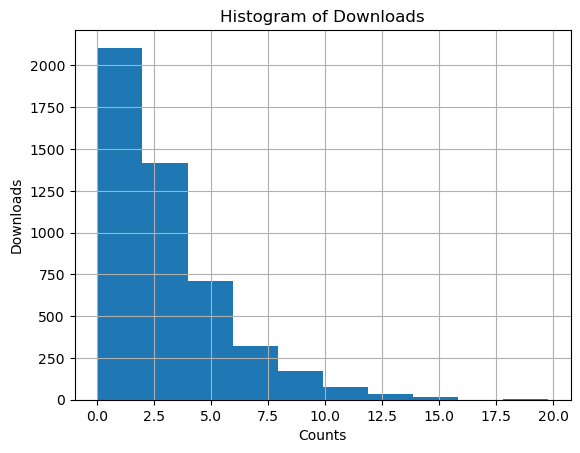

In [106]:
df["Downloads"].hist()
plt.xlabel("Counts")
plt.ylabel("Downloads")
plt.title("Histogram of Downloads")
plt.show()

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


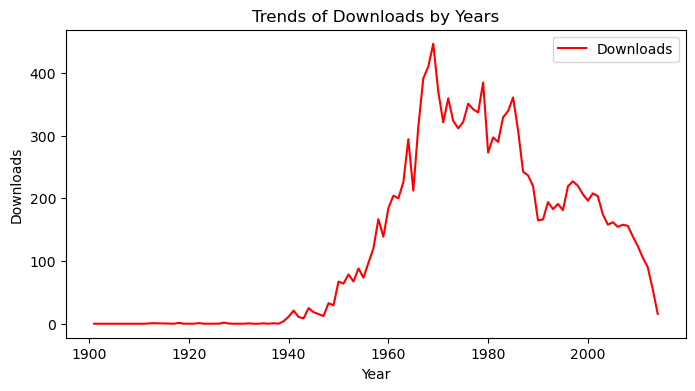

In [107]:
downloads = df.groupby('Year')['Downloads'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=downloads, x='Year', y='Downloads', label='Downloads', color='red')
plt.title("Trends of Downloads by Years")
plt.xlabel("Year")
plt.ylabel("Downloads")
plt.legend()
plt.show()

In [108]:
# 10 most downloaded song 
m_download=df.sort_values("Downloads",ascending=False).head(10)
m_download=m_download[["Title","Downloads"]].set_index("Title")
m_download

,Downloads
Title,
Bohemian Rhapsody,19.780
Imagine,17.978
Hey Jude,16.390
Karma Chameleon,15.818
A Whiter Shade of Pale,15.602
Don't Go Breaking My Heart,15.289
Tie a Yellow Ribbon 'round the Old Oak Tree,15.219
You're the One That I Want,14.992
I'm a Believer,14.769


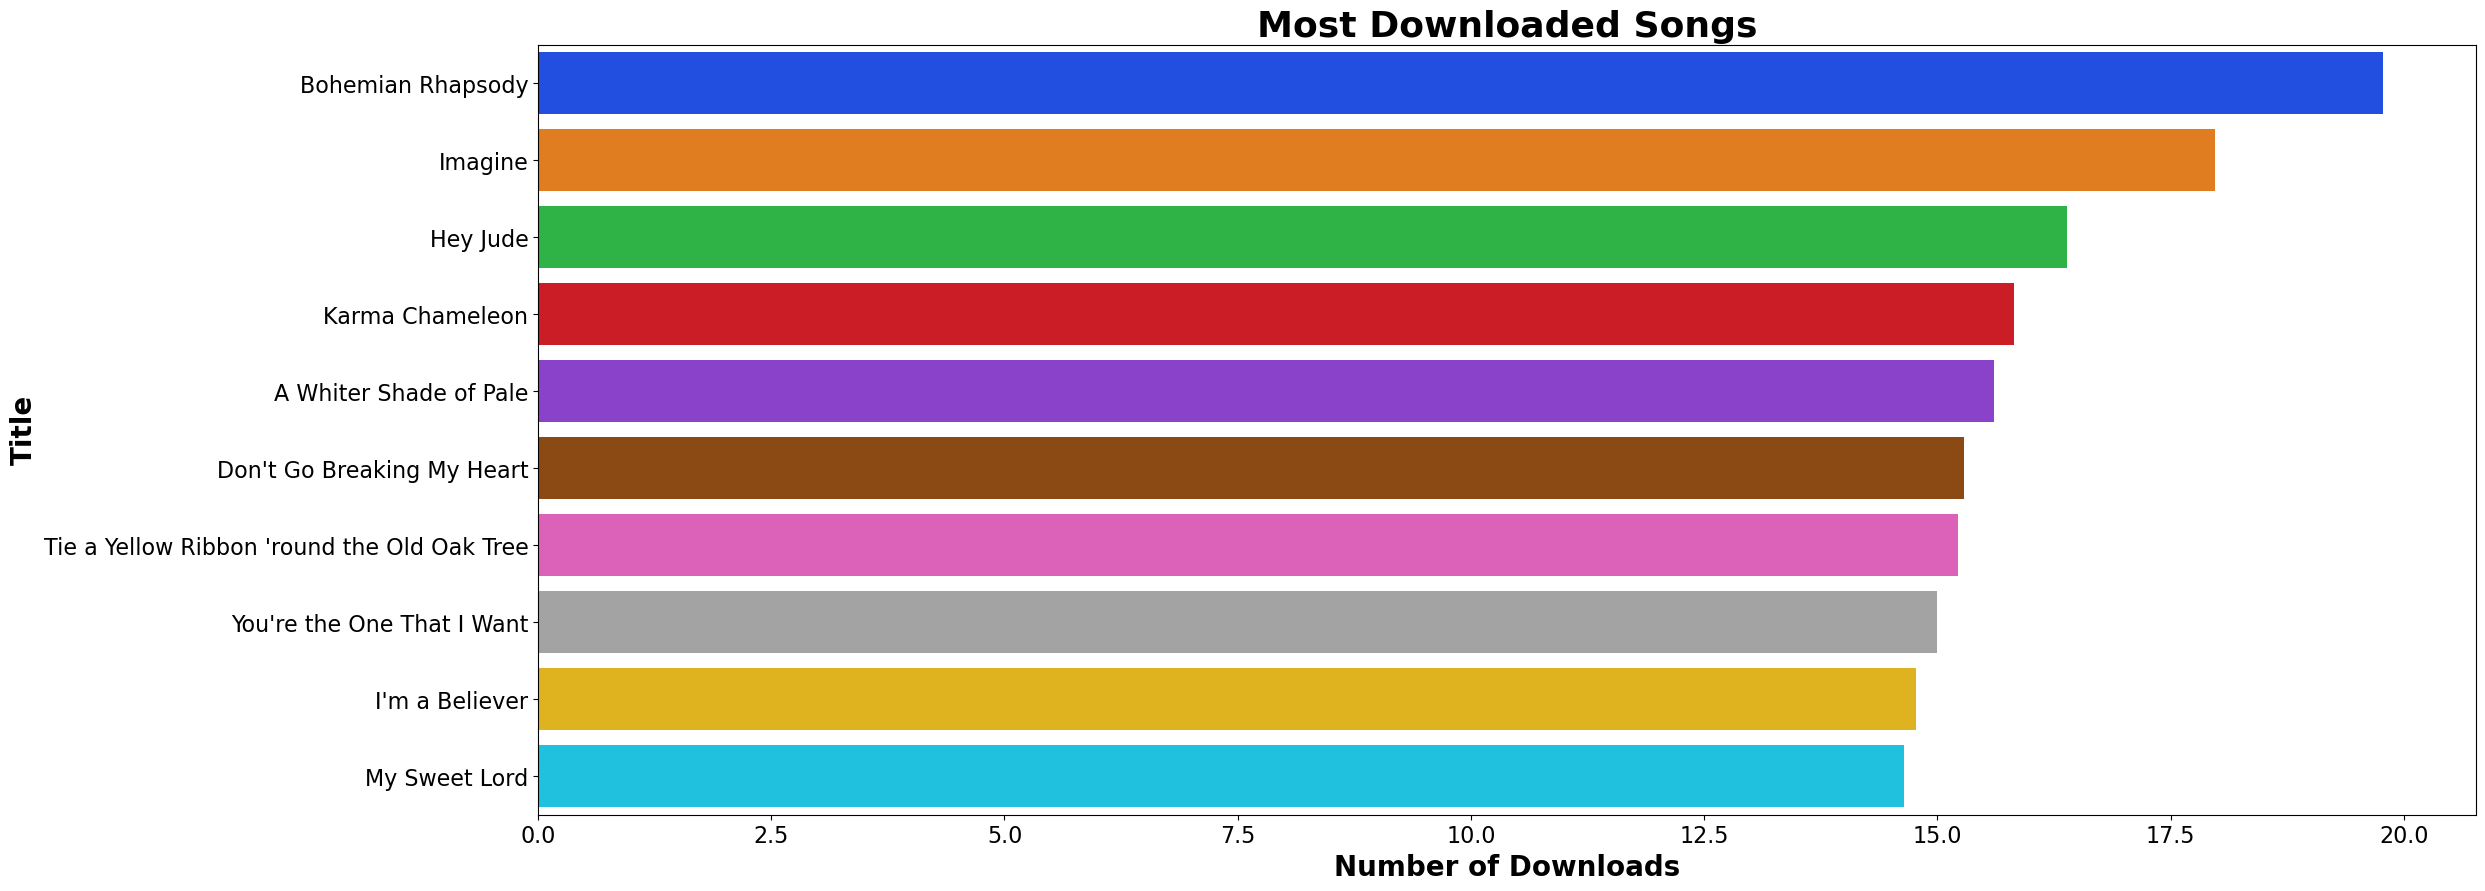

In [109]:
plt.figure(figsize=(25,10))
sns.barplot(data=m_download,x="Downloads",y=m_download.index,palette="bright")
plt.title("Most Downloaded Songs",fontsize=26,fontweight='bold')
plt.xlabel("Number of Downloads",fontsize=20,fontweight='bold')
plt.ylabel("Title",fontsize=20,fontweight='bold')
plt.xticks(fontsize=16)  # Increase font size of the x-axis tick labels
plt.yticks(fontsize=16)  # Increase font size of the x-axis tick labels

plt.show()

In [110]:
# 10 least downloaded song 
l_download=df.sort_values("Downloads",ascending=False).tail(10)
l_download=l_download[["Title","Downloads"]].set_index("Title")
l_download

,Downloads
Title,
Blue Moon of Kentucky,0.0
Kiss Of Fire,0.0
Miss You,0.0
Apres Toi,0.0
"California, Here I Come",0.0
I Like Chopin,0.0
Jersey Bounce,0.0
"Managua, Nicaragua",0.0
GI Jive,0.0


# Radio Plays

In [113]:
df["Radio Plays"].describe().reset_index()

,index,Radio Plays
0,count,4850.000000
1,mean,3.985120
2,std,4.354419
3,min,0.000000
4,25%,0.600000
5,50%,2.570000
6,75%,5.884000
7,max,24.393000


In [115]:
df[df["Radio Plays"]>5.88].sort_values("Radio Plays",ascending=False)

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
36,Stevie Wonder,I Just Called to Say I Love You,1984,25.939,8.760,13.416,24.393,0.833
2,Sinead O'Connor,Nothing Compares 2 U,1990,35.135,14.582,10.242,23.747,2.733
1,Celine Dion,My Heart Will Go On,1998,35.405,12.636,8.944,23.701,3.610
45,Barbra Streisand,A Woman in Love,1980,25.365,8.126,10.299,23.377,0.511
6,Pink Floyd,Another Brick in the Wall (part 2),1980,32.020,13.081,13.339,23.347,1.553
...,...,...,...,...,...,...,...,...
2202,Depeche Mode,Strangelove,1987,6.812,2.593,2.129,5.895,0.514
3729,Marilyn Manson,Tainted Love,2002,4.968,0.811,0.700,5.895,0.518
795,K-Ci & JoJo,All My Life,1998,11.967,4.001,4.225,5.891,1.573
615,Paula Abdul & The Wild Pair,Opposites Attract,1990,12.993,4.992,5.143,5.889,1.361


In [116]:
print("Min:",df["Radio Plays"].min())
print("max",df["Radio Plays"].max())
print("mean",df["Radio Plays"].mean())
print("median",df["Radio Plays"].median())
print("Skew",df["Radio Plays"].skew())

Min: 0.0
max 24.393
mean 3.9851197938144325
median 2.57
Skew 1.5723019885351917


In [117]:
Radio_Plays_q25,Radio_Plays_q75=np.percentile(df["Radio Plays"],(25,75))
Radio_Plays_IQR=Radio_Plays_q75-Radio_Plays_q25
Radio_Plays_q0=Radio_Plays_q25-(1.5*Radio_Plays_IQR)
Radio_Plays_q100=Radio_Plays_q75+(1.5*Radio_Plays_IQR)

print("IQR:",Radio_Plays_IQR)
print("q0:",Radio_Plays_q0)
print("q25:",Radio_Plays_q25)
print("q75:",Radio_Plays_q75)
print("q100:",Radio_Plays_q100)

IQR: 5.284000000000001
q0: -7.326000000000001
q25: 0.6
q75: 5.884
q100: 13.810000000000002


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


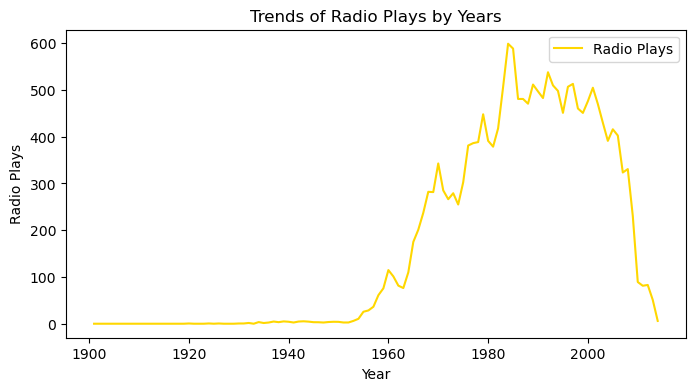

In [118]:
Radio_Plays = df.groupby('Year')['Radio Plays'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=Radio_Plays, x='Year', y='Radio Plays', label='Radio Plays', color='gold')
plt.title("Trends of Radio Plays by Years")
plt.xlabel("Year")
plt.ylabel("Radio Plays")
plt.legend()
plt.show()

# Ratings

In [120]:
df["Rating"].describe()

count    4850.000000
mean        0.481876
std         0.624719
min         0.000000
25%         0.000000
50%         0.512000
75%         0.571000
max         4.460000
Name: Rating, dtype: float64

In [121]:
print("Min:",df["Rating"].min())
print("max",df["Rating"].max())
print("mean",df["Rating"].mean())
print("median",df["Rating"].median())
print("Skew",df["Rating"].skew())

Min: 0.0
max 4.46
mean 0.48187649484536077
median 0.512
Skew 1.7163566453250874


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


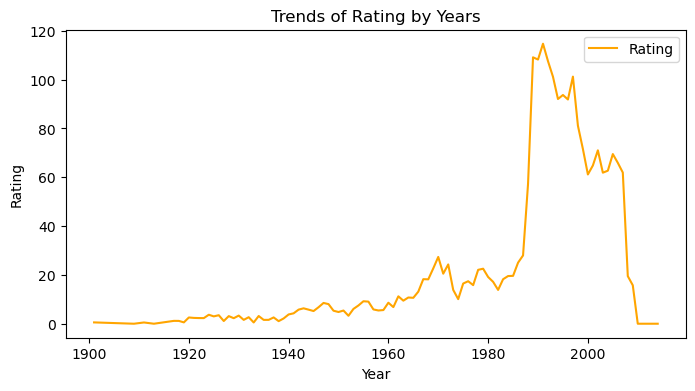

In [122]:
Rating = df.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=Rating, x='Year', y='Rating', label='Rating', color='orange')
plt.title("Trends of Rating by Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [123]:
# Higest Rating Song
df[df["Rating"]==df["Rating"].max()]["Title"].reset_index()

,index,Title
0,5,I Will Always Love You


In [124]:
# Top Rated Song summary
df[df["Rating"]==df["Rating"].max()]

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
5,Whitney Houston,I Will Always Love You,1992,34.112,14.873,11.29,20.753,4.46


In [125]:
# Number of song with 0.0 Rating
print("Total Number of Song has 0.0 Rating : ",df[df["Rating"]==df["Rating"].min()].shape[0])

Total Number of Song has 0.0 Rating :  2245


In [126]:
# 0.0 Rated Song list
df[df["Rating"]==df["Rating"].min()]

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
47,Judy Garland,Over the Rainbow,1939,25.291,17.159,3.000,0.700,0.0
68,Rihanna & Calvin Harris,We Found Love,2011,23.373,10.589,6.583,6.563,0.0
135,LMFAO,Party Rock Anthem,2011,20.722,8.541,7.500,5.050,0.0
150,The Kingston Trio,Tom Dooley,1958,20.203,9.107,5.025,7.256,0.0
169,Eminem & Rihanna,Love The Way You Lie,2010,19.353,5.323,7.000,6.567,0.0
...,...,...,...,...,...,...,...,...
4841,Depeche Mode,Never Let Me Down Again,1987,4.153,2.343,1.112,4.192,0.0
4842,Bob Crosby & his Orchestra,Whispers in The Dark,1937,4.151,4.143,0.000,0.000,0.0
4844,Major Lance,Monkey Time,1963,4.151,5.426,0.531,0.000,0.0
4847,Sailor,"Girls, Girls, Girls",1976,4.149,0.200,1.220,6.344,0.0


In [128]:
# Sum of sale with rating 0.0
df[df["Rating"]==df["Rating"].min()]["Sales"].sum()

14762.804

In [130]:
# Sum of download with rating 0.0 
df[df["Rating"]==df["Rating"].min()]["Downloads"].sum()

6649.491

In [131]:
# Rating wise number of songs
rating_song_no=df["Rating"].value_counts().reset_index()
rating_song_no.set_index("Rating",inplace=True)
rating_song_no

,count
Rating,
0.000,2245
0.511,97
0.512,86
0.514,64
0.513,59
...,...
1.936,1
2.833,1
1.311,1


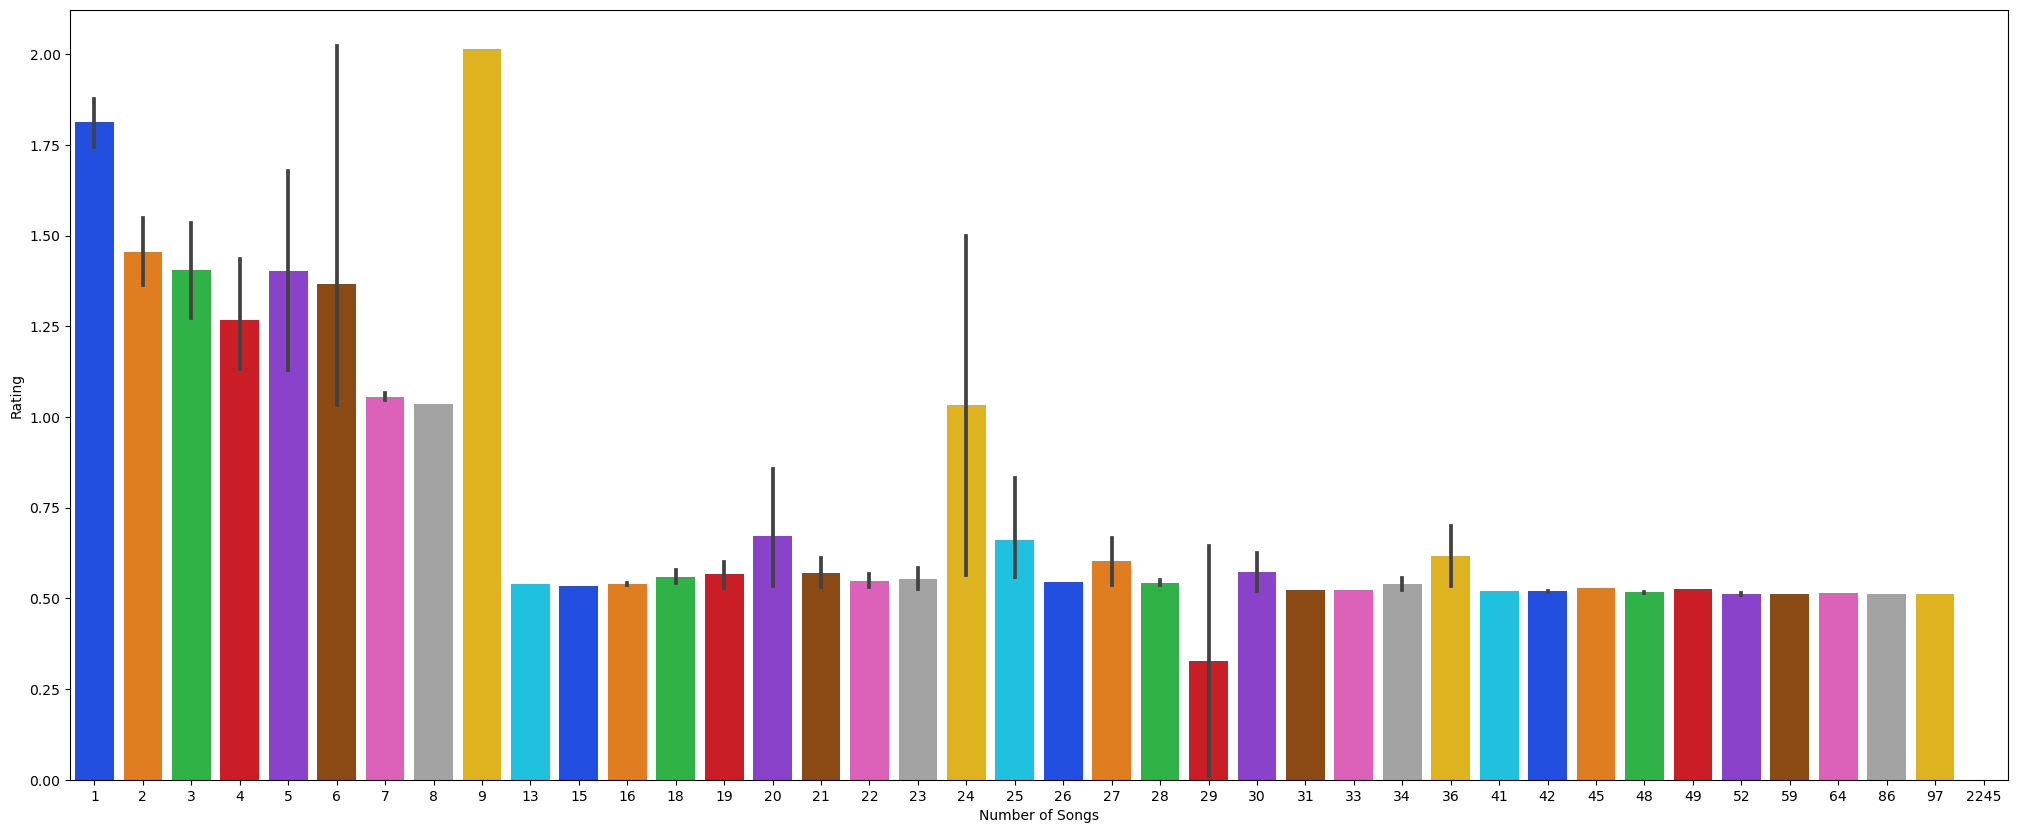

In [132]:
plt.figure(figsize=(25,10))
sns.barplot(data=rating_song_no,x="count",y=rating_song_no.index,palette="bright")
plt.xlabel("Number of Songs")
plt.show()

# Artist

In [135]:
# number of song by artist
df.groupby("Artist")["Artist"].value_counts().reset_index()

,Artist,count
0,"10,000 Maniacs",1
1,10CC,5
2,1910 Fruitgum Co,3
3,2 In A Room,1
4,2 Unlimited,5
...,...,...
2238,Zucchero Fornaciari & Paul Young,1
2239,blink-182,1
2240,fun.,2
2241,t.A.T.u.,2


In [136]:
# 10 highest number of song by artist
artist10=df.groupby("Artist")["Artist"].value_counts().reset_index().sort_values(by="count",ascending=False).head(10)
artist10.set_index("Artist",inplace=True)
pd.DataFrame(artist10["count"])

,count
Artist,
Madonna,48
The Beatles,43
Elvis Presley,43
The Rolling Stones,31
Michael Jackson,29
Elton John,28
Mariah Carey,26
Bing Crosby,24
Prince,21


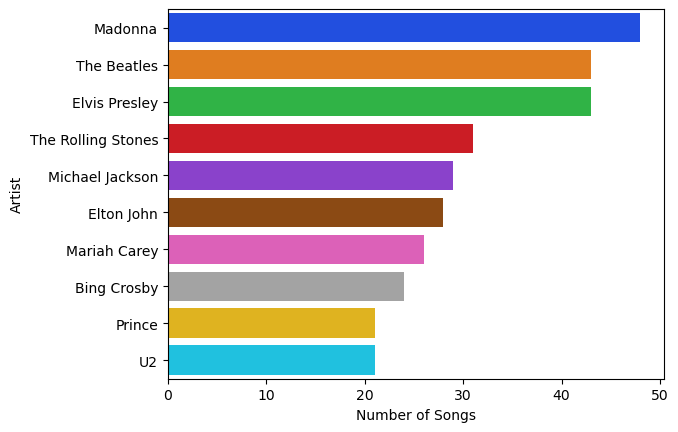

In [137]:
sns.barplot(x="count",y=artist10.index,data=artist10,palette="bright")
plt.xlabel("Number of Songs")
plt.show()